**Tools - pandas**

*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

Prerequisites:
* NumPy – if you are not familiar with NumPy, we recommend that you go through the [NumPy tutorial](tools_numpy.ipynb) now.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-mlp/blob/main/tools_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-mlp/blob/main/tools_pandas.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import `pandas`. People usually import it as `pd`:

In [1]:
import pandas as pd

# `Series` objects
The `pandas` library contains the following useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

## Creating a `Series`
Let's start by creating our first `Series` object!

In [2]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [3]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [5]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called * broadcasting*:

In [6]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [7]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting from `0`) but you can also set the index labels manually:

In [8]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

You can then use the `Series` just like a `dict`:

In [9]:
s2["bob"]

np.int64(83)

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [10]:
s2.loc["bob"]

np.int64(83)

In [11]:
s2.iloc[1]

np.int64(83)

Slicing a `Series` also slices the index labels:

In [12]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [13]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [14]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh, look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [15]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [16]:
surprise_slice.iloc[0]

np.int64(1002)

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [18]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [19]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [20]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value (i.e. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [22]:
s5 = pd.Series([1000,1000,1000,1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result.

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [23]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` name
A `Series` can have a `name`:

In [24]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the [matplotlib tutorial](tools_matplotlib.ipynb)). Just import matplotlib and call the `plot()` method:

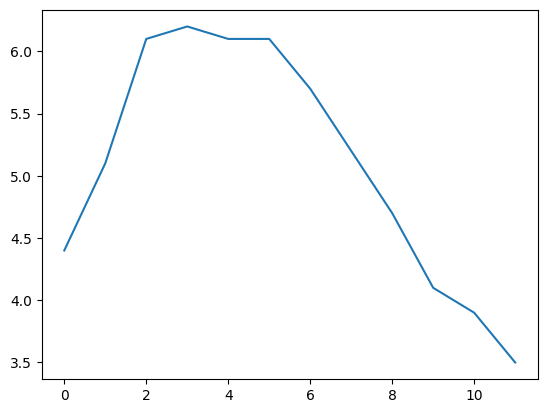

In [25]:
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

There are *many* options for plotting your data. It is not necessary to list them all here: if you need a particular type of plot (histograms, pie charts, etc.), just look for it in the excellent [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) section of pandas' documentation, and look at the example code.

# Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,
* it can handle timezones.

## Time range
Let's start by creating a time series using `pd.date_range()`. It returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th 2016 at 5:30pm.

In [26]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='h')
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='h')

This `DatetimeIndex` may be used as an index in a `Series`:

In [27]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: h, dtype: float64

Let's plot this series:

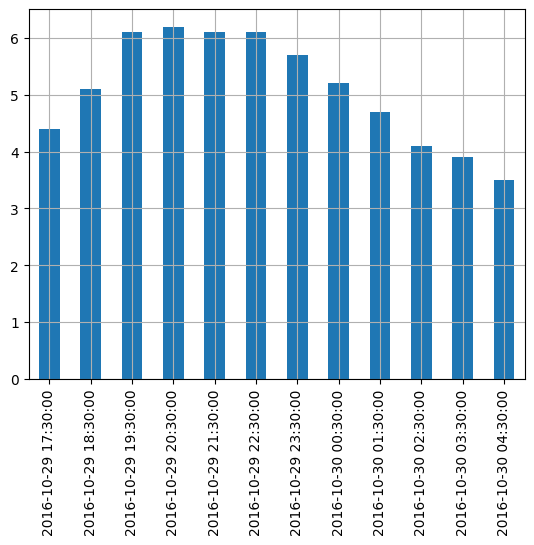

In [28]:
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

## Resampling
Pandas lets us resample a time series very simply. Just call the `resample()` method and specify a new frequency:

In [29]:
temp_series_freq_2h = temp_series.resample("2h")
temp_series_freq_2h

The resampling operation is actually a deferred operation, which is why we did not get a `Series` object, but a `DatetimeIndexResampler` object instead. To actually perform the resampling operation, we can simply call the `mean()` method. Pandas will compute the mean of every pair of consecutive hours:

In [30]:
temp_series_freq_2h = temp_series_freq_2h.mean()

Let's plot the result:

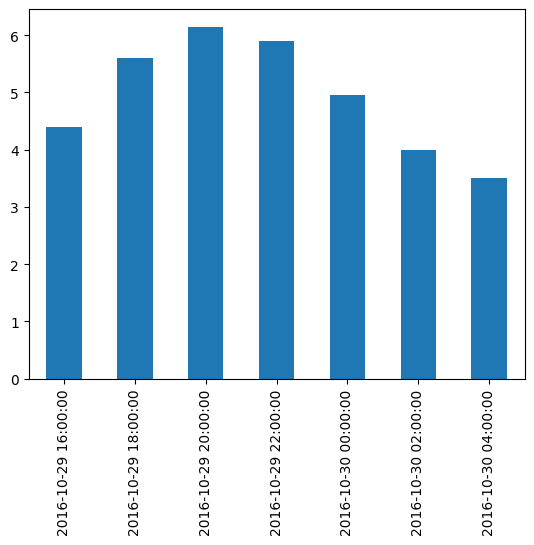

In [31]:
temp_series_freq_2h.plot(kind="bar")
plt.show()

Note how the values have automatically been aggregated into 2-hour periods. If we look at the 6-8pm period, for example, we had a value of `5.1` at 6:30pm, and `6.1` at 7:30pm. After resampling, we just have one value of `5.6`, which is the mean of `5.1` and `6.1`. Rather than computing the mean, we could have used any other aggregation function, for example we can decide to keep the minimum value of each period:

In [32]:
temp_series_freq_2h = temp_series.resample("2h").min()
temp_series_freq_2h

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2h, dtype: float64

Or, equivalently, we could use the `apply()` method instead:

In [33]:
temp_series_freq_2h = temp_series.resample("2h").apply("min")
temp_series_freq_2h

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2h, dtype: float64

## Upsampling and interpolation
It was an example of downsampling. We can also upsample (i.e. increase the frequency), but it will create holes in our data:

In [31]:
temp_series_freq_15min = temp_series.resample("15Min").mean()
temp_series_freq_15min.head(n=10) # `head` displays the top n values

One solution is to fill the gaps by interpolating. We just call the `interpolate()` method. The default is to use linear interpolation, but we can also select another method, such as cubic interpolation:

In [32]:
temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

In [33]:
temp_series.plot(label="Period: 1 hour")
temp_series_freq_15min.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

## Timezones
By default, datetimes are *naive*: they are not aware of timezones, so 2016-10-30 02:30 might mean October 30th 2016 at 2:30am in Paris or in New York. We can make datetimes timezone *aware* by calling the `tz_localize()` method:

In [34]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

Note that `-04:00` is now appended to all the datetimes. It means that these datetimes refer to [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) - 4 hours.

We can convert these datetimes to Paris time like this:

In [35]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

You may have noticed that the UTC offset changes from `+02:00` to `+01:00`: this is because France switches to winter time at 3am that particular night (time goes back to 2am). Notice that 2:30am occurs twice! Let's go back to a naive representation (if you log some data hourly using local time, without storing the timezone, you might get something like this):

In [36]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

Now `02:30` is really ambiguous. If we try to localize these naive datetimes to the Paris timezone, we get an error:

In [37]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

Fortunately, by using the `ambiguous` argument we can tell pandas to infer the right DST (Daylight Saving Time) based on the order of the ambiguous timestamps:

In [38]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

## Periods
The `pd.period_range()` function returns a `PeriodIndex` instead of a `DatetimeIndex`. For example, let's get all quarters in 2016 and 2017:

In [39]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

Adding a number `N` to a `PeriodIndex` shifts the periods by `N` times the `PeriodIndex`'s frequency:

In [40]:
quarters + 3

The `asfreq()` method lets us change the frequency of the `PeriodIndex`. All periods are lengthened or shortened accordingly. For example, let's convert all the quarterly periods to monthly periods (zooming in):

In [41]:
quarters.asfreq("M")

By default, the `asfreq` zooms on the end of each period. We can tell it to zoom on the start of each period instead:

In [42]:
quarters.asfreq("M", how="start")

And we can zoom out:

In [43]:
quarters.asfreq("Y")

Of course, we can create a `Series` with a `PeriodIndex`:

In [44]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index=quarters)
quarterly_revenue

In [45]:
quarterly_revenue.plot(kind="line")
plt.show()

We can convert periods to timestamps by calling `to_timestamp`. By default, it will give us the first day of each period, but by setting `how` and `freq`, we can get the last hour of each period:

In [46]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="h")
last_hours

And back to periods by calling `to_period`:

In [47]:
last_hours.to_period()

Pandas also provides many other time-related functions that we recommend you check out in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). To whet your appetite, here is one way to get the last business day of each month in 2016, at 9am:

In [48]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("h") + 9

# `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`
You can create a DataFrame by passing a dictionary of `Series` objects:

In [49]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

A few things to note:
* the `Series` were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),
* `DataFrame`s are displayed nicely in Jupyter notebooks, woohoo!

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [50]:
people["birthyear"]

You can also get multiple columns at once:

In [51]:
people[["birthyear", "hobby"]]

If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [52]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [53]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

To specify missing values, you can use either `np.nan` or NumPy's masked arrays:

In [54]:
masked_array = np.ma.asarray(values, dtype=object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [55]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

It is also possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or lists):

In [56]:
people = pd.DataFrame({
    "birthyear": {"alice": 1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice": "Biking", "bob": "Dancing"},
    "weight": {"alice": 68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

## Multi-indexing
If all columns are tuples of the same size, then they are understood as a multi-index. The same goes for row index labels. For example:

In [57]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"): 1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"): "Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"): 68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"): np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

You can now get a `DataFrame` containing all the `"public"` columns very simply:

In [58]:
d5["public"]

In [59]:
d5["public", "hobby"]  # Same result as d5["public"]["hobby"]

## Dropping a level
Let's look at `d5` again:

In [60]:
d5

There are two levels of columns, and two levels of indices. We can drop a column level by calling `droplevel()` (the same goes for indices):

In [61]:
d5.columns = d5.columns.droplevel(level = 0)
d5

## Transposing
You can swap columns and indices using the `T` attribute:

In [62]:
d6 = d5.T
d6

## Stacking and unstacking levels
Calling the `stack()` method will push the lowest column level after the lowest index:

In [63]:
d7 = d6.stack()
d7

Note that many `NaN` values appeared. This makes sense because many new combinations did not exist before (e.g. there was no `bob` in `London`).

Calling `unstack()` will do the reverse, once again creating many `NaN` values.

In [64]:
d8 = d7.unstack()
d8

If we call `unstack` again, we end up with a `Series` object:

In [65]:
d9 = d8.unstack()
d9

The `stack()` and `unstack()` methods let you select the `level` to stack/unstack. You can even stack/unstack multiple levels at once:

In [66]:
d10 = d9.unstack(level = (0,1))
d10

## Most methods return modified copies
As you may have noticed, the `stack()` and `unstack()` methods do not modify the object they are called on. Instead, they work on a copy and return that copy. This is true of most methods in pandas.

## Accessing rows
Let's go back to the `people` `DataFrame`:

In [67]:
people

The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [68]:
people.loc["charles"]

You can also access rows by integer location using the `iloc` attribute:

In [69]:
people.iloc[2]

You can also get a slice of rows, and this returns a `DataFrame` object:

In [70]:
people.iloc[1:3]

Finally, you can pass a boolean array to get the matching rows:

In [71]:
people[np.array([True, False, True])]

This is most useful when combined with boolean expressions:

In [72]:
people[people["birthyear"] < 1990]

## Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following works fine:

In [73]:
people

In [74]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

In [75]:
birthyears

When you add a new column, it must have the same number of rows. Missing rows are filled with NaN, and extra rows are ignored:

In [76]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene": 1})  # alice is missing, eugene is ignored
people

When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [77]:
people.insert(1, "height", [172, 181, 185])
people

## Assigning new columns
You can also create new columns by calling the `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [78]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

Note that you cannot access columns created within the same assignment:

In [79]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

The solution is to split this assignment in two consecutive assignments:

In [80]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

Having to create a temporary variable `d6` is not very convenient. You may want to just chain the assignment calls, but it does not work because the `people` object is not actually modified by the first assignment:

In [81]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

But fear not, there is a simple solution. You can pass a function to the `assign()` method (typically a `lambda` function), and this function will be called with the `DataFrame` as a parameter:

In [82]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

Problem solved!

## Evaluating an expression
A great feature supported by pandas is expression evaluation. It relies on the `numexpr` library which must be installed.

In [83]:
people.eval("weight / (height/100) ** 2 > 25")

Assignment expressions are also supported. Let's set `inplace=True` to directly modify the `DataFrame` rather than getting a modified copy:

In [84]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

You can use a local or global variable in an expression by prefixing it with `'@'`:

In [85]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

## Querying a `DataFrame`
The `query()` method lets you filter a `DataFrame` based on a query expression:

In [86]:
people.query("age > 30 and pets == 0")

## Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default, it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [87]:
people.sort_index(ascending=False)

Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`:

In [88]:
people.sort_index(axis=1, inplace=True)
people

To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [89]:
people.sort_values(by="age", inplace=True)
people

## Plotting a `DataFrame`
Just like for `Series`, pandas makes it easy to draw nice graphs based on a `DataFrame`.

For example, it is trivial to create a line plot from a `DataFrame`'s data by calling its `plot` method:

In [90]:
people.sort_values(by="body_mass_index", inplace=True)
people.plot(kind="line", x="body_mass_index", y=["height", "weight"])
plt.show()

You can pass extra arguments supported by matplotlib's functions. For example, we can create scatterplot and pass it a list of sizes using the `s` argument of matplotlib's `scatter()` function:

In [91]:
people.plot(kind="scatter", x="height", y="weight", s=[40, 120, 200])
plt.show()

Again, there are way too many options to list here: the best option is to scroll through the [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) page in pandas' documentation, find the plot you are interested in and look at the example code.

## Operations on `DataFrame`s
Although `DataFrame`s do not try to mimic NumPy arrays, there are a few similarities. Let's create a `DataFrame` to demonstrate this:

In [92]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice", "bob", "charles", "darwin"])
grades

You can apply NumPy mathematical functions on a `DataFrame`: the function is applied to all values:

In [93]:
np.sqrt(grades)

Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame`. This is called *broadcasting*:

In [94]:
grades + 1

Of course, the same is true for all other binary operations, including arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...) operations:

In [95]:
grades >= 5

Aggregation operations, such as computing the `max`, the `sum` or the `mean` of a `DataFrame`, apply to each column, and you get back a `Series` object:

In [96]:
grades.mean()

The `all` method is also an aggregation operation: it checks whether all values are `True` or not. Let's see during which months all students got a grade greater than `5`:

In [97]:
(grades > 5).all()

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [98]:
(grades > 5).all(axis=1)

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [99]:
(grades == 10).any(axis=1)

If you add a `Series` object to a `DataFrame` (or execute any other binary operation), pandas attempts to broadcast the operation to all *rows* in the `DataFrame`. This only works if the `Series` has the same size as the `DataFrame`s rows. For example, let's subtract the `mean` of the `DataFrame` (a `Series` object) from the `DataFrame`:

In [100]:
grades - grades.mean()  # equivalent to: grades - [7.75, 8.75, 7.50]

We subtracted `7.75` from all September grades, `8.75` from October grades and `7.50` from November grades. It is equivalent to subtracting this `DataFrame`:

In [101]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

If you want to subtract the global mean from every grade, here is one way to do it:

In [102]:
grades - grades.values.mean() # subtracts the global mean (8.00) from all grades

## Automatic alignment
Similar to `Series`, when operating on multiple `DataFrame`s, pandas automatically aligns them by row index label, but also by column names. Let's create a `DataFrame` with bonus points for each person from October to December:

In [103]:
bonus_array = np.array([[0, np.nan, 2], [np.nan, 1, 0], [0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob", "colin", "darwin", "charles"])
bonus_points

In [104]:
grades + bonus_points

Looks like the addition worked in some cases but way too many elements are now empty. That's because when aligning the `DataFrame`s, some columns and rows were only present on one side, and thus they were considered missing on the other side (`NaN`). Then adding `NaN` to a number results in `NaN`, hence the result.

## Handling missing data
Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.
 
Let's try to fix the problem above. For example, we can decide that missing data should result in a zero, instead of `NaN`. We can replace all `NaN` values by any value using the `fillna()` method:

In [105]:
(grades + bonus_points).fillna(0)

It's a bit unfair that we're setting grades to zero in September, though. Perhaps we should decide that missing grades are missing grades, but missing bonus points should be replaced by zeros:

In [106]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

That's much better: although we made up some data, we have not been too unfair.

Another way to handle missing data is to interpolate. Let's look at the `bonus_points` `DataFrame` again:

In [107]:
bonus_points

Now let's call the `interpolate` method. By default, it interpolates vertically (`axis=0`), so let's tell it to interpolate horizontally (`axis=1`).

In [108]:
bonus_points.interpolate(axis=1)

Bob had 0 bonus points in October, and 2 in December. When we interpolate for November, we get the mean: 1 bonus point. Colin had 1 bonus point in November, but we do not know how many bonus points he had in September, so we cannot interpolate, this is why there is still a missing value in October after interpolation. To fix this, we can set the September bonus points to 0 before interpolation.

In [109]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

Great, now we have reasonable bonus points everywhere. Let's find out the final grades:

In [110]:
grades + better_bonus_points

It is slightly annoying that the September column ends up on the right. This is because the `DataFrame`s we are adding do not have the exact same columns (the `grades` `DataFrame` is missing the `"dec"` column), so to make things predictable, pandas orders the final columns alphabetically. To fix this, we can simply add the missing column before adding:

In [111]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

There's not much we can do about December and Colin: it's bad enough that we are making up bonus points, but we can't reasonably make up grades (well, I guess some teachers probably do). So let's call the `dropna()` method to get rid of rows that are full of `NaN`s:

In [112]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

Now let's remove columns that are full of `NaN`s by setting the `axis` argument to `1`:

In [113]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

## Aggregating with `groupby`
Similar to the SQL language, pandas allows grouping your data into groups to run calculations over each group.

First, let's add some extra data about each person so we can group them, and let's go back to the `final_grades` `DataFrame` so we can see how `NaN` values are handled:

In [114]:
final_grades["hobby"] = ["Biking", "Dancing", np.nan, "Dancing", "Biking"]
final_grades

Now let's group data in this `DataFrame` by hobby:

In [115]:
grouped_grades = final_grades.groupby("hobby")
grouped_grades

We are ready to compute the average grade per hobby:

In [116]:
grouped_grades.mean()

That was easy! Note that the `NaN` values have simply been skipped when computing the means.

## Pivot tables
Pandas supports spreadsheet-like [pivot tables](https://en.wikipedia.org/wiki/Pivot_table) that allow quick data summarization. To illustrate this, let's create a simple `DataFrame`:

In [117]:
bonus_points

In [118]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ["name", "month", "grade"]
more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

Now we can call the `pd.pivot_table()` function for this `DataFrame`, asking to group by the `name` column. By default, `pivot_table()` computes the mean of each numeric column:

In [119]:
pd.pivot_table(more_grades[["name", "grade", "bonus"]], index="name")

We can change the aggregation function by setting the `aggfunc` argument, and we can also specify the list of columns whose values will be aggregated:

In [120]:
pd.pivot_table(more_grades, index="name", values=["grade", "bonus"], aggfunc="max")

We can also specify the `columns` to aggregate over horizontally, and request the grand totals for each row and column by setting `margins=True`:

In [121]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

Finally, we can specify multiple index or column names, and pandas will create multi-level indices:

In [122]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

## Overview functions
When dealing with large `DataFrames`, it is useful to get a quick overview of its content. Pandas offers a few functions for this. First, let's create a large `DataFrame` with a mix of numeric values, missing values and text values. Notice how Jupyter displays only the corners of the `DataFrame`:

In [123]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3, "some_text", "Blabla")
large_df

The `head()` method returns the top 5 rows:

In [124]:
large_df.head()

Of course, there's also a `tail()` function to view the bottom 5 rows. You can pass the number of rows you want:

In [125]:
large_df.tail(n=2)

The `info()` method prints out a summary of each column's contents:

In [126]:
large_df.info()

Finally, the `describe()` method gives a nice overview of the main aggregated values over each column:
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [127]:
large_df.describe()

# Saving & loading
Pandas can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database. Let's create a `DataFrame` to demonstrate this:

In [128]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby", "weight", "birthyear", "children"],
    index=["alice", "bob"]
)
my_df

## Saving
Let's save it to CSV, HTML and JSON:

In [129]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

Done! Let's take a peek at what was saved:

In [130]:
from pathlib import Path

for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    print(Path(filename).read_text())
    print()

Note that the index is saved as the first column in a CSV file, as `<th>` tags in HTML and as keys in JSON. The index column has no name by default, but you can fix that by setting `my_df.index.name` to any name you want.

Saving to other formats works very similarly, but some formats require extra libraries to be installed. For example, saving to Excel requires the openpyxl library:

In [131]:
try:
    my_df.to_excel("my_df.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

## Loading
Now let's load our CSV file back into a `DataFrame`:

In [132]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

As you might guess, there are similar `read_json`, `read_html`, `read_excel` functions as well.  We can also read data straight from the Internet. For example, let's load the top 1,000 U.S. cities from GitHub:

In [133]:
us_cities = None
try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
us_cities

There are more options available, in particular regarding datetime format. Check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for more details.

# Combining `DataFrame`s

## SQL-like joins
One powerful feature of pandas is its ability to perform SQL-like joins on `DataFrame`s. Various types of joins are supported: inner joins, left/right outer joins and full joins. To illustrate this, let's start by creating a couple of simple `DataFrame`s:

In [134]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

In [135]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

Now let's join these `DataFrame`s using the `merge()` function:

In [136]:
pd.merge(left=city_loc, right=city_pop, on="city")

Note that both `DataFrame`s have a column named `state`, so in the result they got renamed to `state_x` and `state_y`.

Also, note that Cleveland, Salt Lake City and Houston were dropped because they don't exist in *both* `DataFrame`s. This is the equivalent of a SQL `INNER JOIN`. If you want a `FULL OUTER JOIN`, where no city gets dropped and `NaN` values are added, you must specify `how="outer"`:

In [137]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

Of course, `LEFT OUTER JOIN` is also available by setting `how="left"`: only the cities present in the left `DataFrame` end up in the result. Similarly, with `how="right"` only cities in the right `DataFrame` appear in the result. For example:

In [138]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

If the key to join on is actually in one (or both) `DataFrame`'s index, you must use `left_index=True` and/or `right_index=True`. If the key column names differ, you must use `left_on` and `right_on`. For example:

In [139]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

## Concatenation
Rather than joining `DataFrame`s, we may just want to concatenate them. That's what `concat()` is for:

In [140]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

Note that this operation aligned the data horizontally (by columns) but not vertically (by rows). In this example, we end up with multiple rows having the same index (e.g. 3). Pandas handles this rather gracefully:

In [141]:
result_concat.loc[3]

Or you can tell pandas to just ignore the index:

In [142]:
pd.concat([city_loc, city_pop], ignore_index=True)

Notice that when a column does not exist in a `DataFrame`, it acts as if it was filled with `NaN` values. If we set `join="inner"`, then only columns that exist in *both* `DataFrame`s are returned:

In [143]:
pd.concat([city_loc, city_pop], join="inner")

You can concatenate `DataFrame`s horizontally instead of vertically by setting `axis=1`:

In [144]:
pd.concat([city_loc, city_pop], axis=1)

In this case it really does not make much sense because the indices do not align well (e.g. Cleveland and San Francisco end up on the same row, because they shared the index label `3`). So let's reindex the `DataFrame`s by city name before concatenating:

In [145]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

This looks a lot like a `FULL OUTER JOIN`, except that the `state` columns were not renamed to `state_x` and `state_y`, and the `city` column is now the index.

# Categories
It is quite frequent to have values that represent categories, for example `1` for female and `2` for male, or `"A"` for Good, `"B"` for Average, `"C"` for Bad. These categorical values can be hard to read and cumbersome to handle, but fortunately pandas makes it easy. To illustrate this, let's take the `city_pop` `DataFrame` we created earlier, and add a column that represents a category:

In [146]:
city_eco = city_pop.copy()
city_eco["eco_code"] = [17, 17, 34, 20]
city_eco

Right now the `eco_code` column is full of apparently meaningless codes. Let's fix that by creating a new categorical column based on the `eco_code`s:

In [147]:
city_eco['economy'] = pd.Categorical(
    city_eco['eco_code'].map({17: 'Banking', 20: 'Energy', 34: 'Tourism'})
)
city_eco

You can get a categorical column's list of categories like this:

In [148]:
city_eco['economy'].cat.categories

And you can rename categories using `rename_categories`:

In [149]:
city_eco['economy'] = city_eco['economy'].cat.rename_categories({'Banking': 'Finance'})
city_eco

# What's next?
As you probably noticed by now, pandas is quite a large library with *many* features. Although we went through the most important features, there is still a lot to discover. Probably the best way to learn more is to get your hands dirty with some real-life data. It is also a good idea to go through pandas' excellent [documentation](https://pandas.pydata.org/pandas-docs/stable/index.html), in particular the [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html).